# 10. Plotdregion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap

def plot_decision_region(X,y, classifier, test_idx=None, resolution=0.02, title=''):
    
    # 색 설정에 관한 부분
    markers = ('s','x','o','^','v')
    colors = ('r','b','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # decision surface 그리기
    # x1_min, x1_max는 트레이닝 데이터 x의 첫 번재값인 꽃잎길이의 최소값 -1, 최대값 +1 이다. 
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    
    # numpy.meshgrid()는 격자의 교차점 좌표를 편리하게 다룰 수 있도록 값을 리턴하는 함수이다.
    # 아래 예를 보면 이해가 더 쉽다.
    # 즉 xx와 yy는 아이리스 트레이닝 데이터의 꽃잎길이, 꽃잎너비가 분포하는 좌표 격자 교차점을
    # resolution 간격으로 편리하게 만들어 줄 수 있는 값을 가지고 있다.
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    
    # xx,yy를 ravel()을 이용해서 1차원 배열 즉 한줄로 만든 후 전치행렬로 변환하여 퍼셉트론 분류기의
    # predict()의 인자로 입력하여 계산된 예측 값을 Z로 둔다. 그리고 reshape를 하여 원래 배열로 복원한다.
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    
    # Z를 xx, yy가 축인 그래프상에 cmap을 이용해 등고선을 그린다.
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())
    
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), marker=markers[idx],label=cl)
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c=['red','blue','lightgreen','gray','cyan'][idx],linewidth=1, marker='o',s=80, label='Test set')
        
    plt.xlabel('std_length_flower')
    plt.ylabel('std_cup_flower')
    plt.legend(loc=2)
    plt.title(title)
    plt.show()

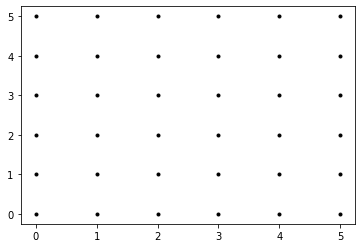

In [2]:
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]
xx, yy = np.meshgrid(x,y)
plt.plot(xx,yy, marker='.', color='k', linestyle='none')

In [3]:
xx

array([[0, 1, 2, 3, 4, 5],
       [0, 1, 2, 3, 4, 5],
       [0, 1, 2, 3, 4, 5],
       [0, 1, 2, 3, 4, 5],
       [0, 1, 2, 3, 4, 5],
       [0, 1, 2, 3, 4, 5]])

In [4]:
xx.ravel()

array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5])